# **Project Name**    - Topic-Modeling On News Article



##### **Project Type**    - Capstone project 4 Unsupervised Learning
##### **Contribution**    - Team
##### **Team Member 1 -  Purushotam** 
##### **Team Member 2 -  Rajat Sharma**

# **Project Summary -**

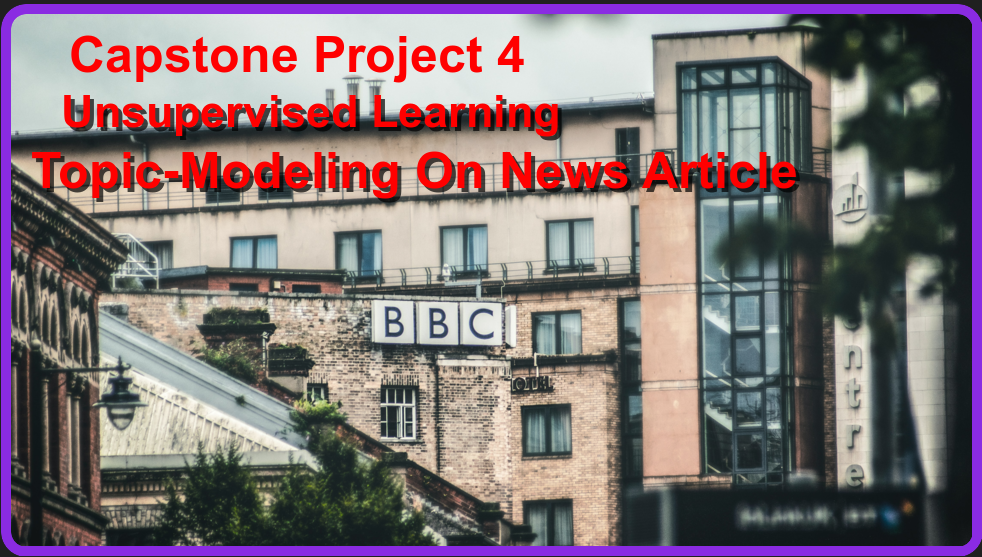

We got this dataset from almabetter for our capstone project unsupervised learning.

Our dataset contains five folders with text document the text document contains various news articles by BBC.

First we made csv file out of the folders as per instructions.The CSV has 2225 row and 2 columns. 

This is an NLP Project in which we have to identify the type of news article based on topics provided.

In this topic modeling project we have performed all the text processing steps like changing all the text to small case,expand contraction, remove punctutation,remove special character and digits,remove stopword and white spaces, and perform tokenization,normalization by lemmatizer and portstemmer.

To build the model we used LDA by gensim.To visualise the text importance we used pyLDAvis. For XGboost we plotting tree plot to visualise the feature under consideration.We also used neural network so that deep learning can be used for topic modeling in future.

# **GitHub Link -**

https://github.com/Purhsotam/Usupervised-Learining-ML-Projects

# **Problem Statement**


**Business Context**

In this project the task is to identify major themes/topics across a collection of BBC news articles. Using Clustering-algorithms such as Latent Dirichlet Allocation (LDA).

**Dataset Description**

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

**Main Libraries used:**

Pandas for data manipulation, aggregation Matplotlib and Seaborn for visualization and behavior with respect to the target variable

• Gensium for applying LDA

*   NumPy for computationally efficient operations
*   Pandas for various operations on dataframe tasks

*   seaborn, matplotlib for plotting graphs and charts
*   nltk for text pre processing


**Project Architecture:**

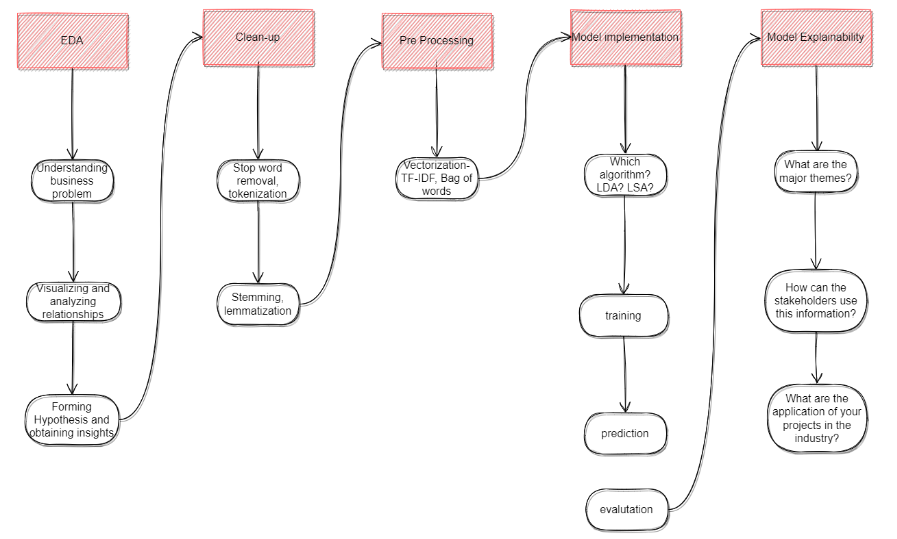

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Installing Libraries

In [1]:
!pip install -U gensim   # To update gensim library  for LDA  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pyLDAvis # To plot the LDA model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 32.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud # To make the word cloud
import string
import warnings
warnings.filterwarnings("ignore") #This will ignore all DeprecationWarning warnings in your code.

In [4]:
# Text preprocessing libraries
import re
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
# machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix
from sklearn import metrics
from xgboost import XGBClassifier

#import Gensim libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora, models
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

In [6]:
# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense

In [7]:
import tensorflow as tf 
tf.test.gpu_device_name()  #  To check the presence of GPU

''

In [8]:
# model Deploying libraries
import pickle

### Dataset Loading

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Load Dataset
data_folder = "/content/drive/MyDrive/ColabNotebooks/colab projects/unsupervisedproject/data_folder" 
folders = ["business","entertainment","politics","sport","tech"]     # Getting the list of folders for topic modeling

In [11]:
os.listdir(data_folder) # Getting list of folders

['sport', 'politics', 'tech', 'business', 'entertainment']

In [12]:
files = os.listdir("/content/drive/MyDrive/ColabNotebooks/colab projects/unsupervisedproject/data_folder")  

In [13]:
folderslist = [f for f in os.listdir(data_folder) if not f.startswith('.')] 

In [14]:
news = []
newstype = []

In [15]:
# Getting the list of documents insight the folder and appending them by their folder name.
for folder in folders:  
    folder_path = '/content/drive/MyDrive/ColabNotebooks/colab projects/unsupervisedproject/data_folder/'+folder+'/'
    files = os.listdir(folder_path)
    for text_file in files:
        file_path = folder_path + "/" +text_file
        with open(file_path, errors='replace') as f:
            data = f.readlines()
        data = ' '.join(data)
        news.append(data)
        newstype.append(folder)


In [16]:
#make a dict of news and its corresponding type
datadict = {'news':news, 'art_type':newstype}

In [17]:
#write the dictionary to a csv file
df = pd.DataFrame(datadict)
df.to_csv('/content/drive/MyDrive/ColabNotebooks/colab projects/unsupervisedproject/bbc.csv')

In [18]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/colab projects/unsupervisedproject/bbc.csv")

### Dataset First View

In [19]:
# Dataset First Look
data.head()

Unnamed: 0                                               news  art_type
0           0  Yukos unit buyer faces loan claim\n \n The own...  business
1           1  Ad sales boost Time Warner profit\n \n Quarter...  business
2           2  Dollar gains on Greenspan speech\n \n The doll...  business
3           3  US trade gap hits record in 2004\n \n The gap ...  business
4           4  High fuel prices hit BA's profits\n \n British...  business

### Dataset Rows & Columns count

In [20]:
# Dataset Rows & Columns count
data.shape

(2225, 3)

### Dataset Information

In [21]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   art_type    2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


#### Duplicate Values

In [22]:
# Dataset Duplicate Value Count
data.duplicated().value_counts()

False    2225
dtype: int64

#### Missing Values/Null Values

In [23]:
# Missing Values/Null Values Count
data.isnull().value_counts()

Unnamed: 0  news   art_type
False       False  False       2225
dtype: int64

<Axes: >

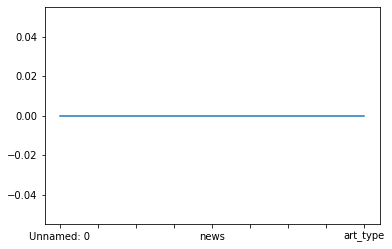

In [24]:
# Visualizing the missing values
data.isnull().sum().plot()

### What did you know about your dataset?

This dataset contains 2225 news items by BBC News with topics

 ['sport', 'politics', 'tech', 'business', 'entertainment'] 
 
 with no duplicate news and null values.

## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns
data.columns

Index(['Unnamed: 0', 'news', 'art_type'], dtype='object')

In [26]:
# Dataset Describe
data.describe()

Unnamed: 0
count  2225.000000
mean   1112.000000
std     642.446496
min       0.000000
25%     556.000000
50%    1112.000000
75%    1668.000000
max    2224.000000

### Variables Description 

This data set contains no numerical variable as it is a topic modeling project.

### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.
for i in range(0,len(data.columns)):
  print("\nunique items in columns no ",i+1, "are:")

  print(data.iloc[:,i].unique())


unique items in columns no  1 are:
[   0    1    2 ... 2222 2223 2224]

unique items in columns no  2 are:
['Yukos unit buyer faces loan claim\n \n The owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.\n \n State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part settle a $27.5bn tax claim against Yukos. Yukos\' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets. Rosneft already faces a similar $540m repayment demand from foreign banks. Legal experts said Rosneft\'s purchase of Yugansk would include such obligations. "The pledged assets are with Rosneft, so it will have to pay real money to the creditors to avoid seizure of Yugansk assets," said Moscow-based US lawyer Jamie Firestone, who is not connected to the case. Menatep Group\'s managing director Tim Osborne told the Reuters news agency: "If they default, we will fight t

## 3. ***Data Wrangling***

### Data Wrangling Code

In [28]:
# Write your code to make your dataset analysis ready.
data = data.drop('Unnamed: 0',axis=1)

In [29]:
data['news_len'] = data['news'].str.len() # Getting the number of characters for each news

In [30]:
data["Number of Words"] = data["news"].apply(lambda n: len(n.split())) # Getting the number of words in news

### What all manipulations have you done and insights you found?

We created two new rows containg number of character in news item respectively.

## **4. Feature Engineering**

### **Check for the colinearity**

In [31]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

         variables         VIF
0         news_len  576.137888
1  Number of Words  576.137888


<Axes: >

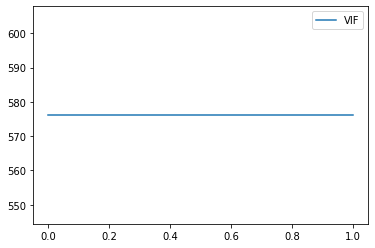

In [32]:
# Calculating VIF for all the columns
print(calc_vif(data[[i for i in data.describe().columns if i  in data.columns]])) 
(calc_vif(data[[i for i in data.describe().columns if i in data.columns]])).plot()  # We will plot the VIF obtain by the  VIF function.

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

news               0
art_type           0
news_len           0
Number of Words    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We do not hane missing values so we can dodge this step.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [34]:
# the dictionary contains the shortcuts used in news items and daily life
contractions_dict = {"ain't": "are not",
                     "Ad" : "advertisement",
                     "US" : "America",
  "'s":" is", "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"}

In [35]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [36]:
# function to match the short words with dictionary and replace with expanded words
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [37]:
# Expanding Contractions in the reviews
data['prepared_words']=data['news'].apply(lambda x:expand_contractions(x))

#### 2. Lower Casing

In [38]:
# Lower Casing
data['prepared_words'] = data['prepared_words'].str.lower()

#### 3. Removing Punctuations

In [39]:
# Function to remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [40]:
data['prepared_words'] = data['prepared_words'].apply(remove_punctuations)

In [41]:
data['prepared_words'] = data['prepared_words'].str.replace('\n','') # removing the new line character

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Functions to Remove URLs & Remove words and digits contain digits
def remove_url(text_data):
  """remove_url takes raw text and removes urls from the text.
     re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
     """
  return re.sub(r"http\S+", "", text_data)


<>:3: DeprecationWarning: invalid escape sequence \d
<>:3: DeprecationWarning: invalid escape sequence \d
<ipython-input-42-4816c2d843d4>:3: DeprecationWarning: invalid escape sequence \d
  """remove_url takes raw text and removes urls from the text.


In [43]:
data['prepared_words'] = data['prepared_words'].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Removing the stop words
stop_words = stopwords.words('english')
data['prepared_words'] = data['prepared_words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#### 6. Tokenization

In [45]:
# performing the Tokenization
data['prepared_words'] = data['prepared_words'].apply(lambda row: nltk.word_tokenize(row))

#### 7. Text Normalization

In [46]:
# Normalizing Text by Lemmatization
wml = WordNetLemmatizer()

In [47]:
# Function to apply lemmatizing
def lemmatize(s):
  '''For lemmatizing the word '''
  s = [wml.lemmatize(word) for word in s]
  return s

In [48]:
# Text normalizer by Stemming
pstem = PorterStemmer()

In [49]:
# Function to apply lemmatizing
def stemming(stm):
  '''For stemming the word '''
  stm = [pstem.stem(word) for word in stm]
  return stm

In [50]:
data['prepared_words'] = data['prepared_words'].apply( lambda x: stemming(x))

In [51]:
data['prepared_words'] = data['prepared_words'].apply( lambda x: lemmatize(x))

##### Which text normalization technique have you used and why?

We performed Stemming and Lemmetizing 

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

In [52]:
#univariate plot function
def uniplot(plotkind = sns.distplot):
  '''
  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np
  Enter the type of plot with seaborn sns.type 
  default plot is distplot
  '''
  myplot = plotkind
  for values in range(0,len(data.columns)):
    if np.issubdtype(data.iloc[:,values].dtype, np.number) == True:
      fig = plt.figure(figsize=(18,6))
      sns.set(style='whitegrid')
      fig.set_facecolor("lightblue")
      plt.title(print("This is dist plot and its details are ",data.iloc[0:0,values],'\n'))
      myplot(data.iloc[:,values])
      plt.show()

In [53]:
#word map viewer function
def wordmapviewer(topic = 'business'):
  newskind = topic
  '''
  enter the news group type like business,tech,sports
  import matplotlib.pyplot as plt
  import numpy as np
  '''
  words = []
  for i in range(0,len(data)):
    if (data['art_type'][i] == newskind):
      words.append(data['prepared_words'][i])
  print(words)

  frequency_dist = nltk.FreqDist(words[0])
  wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

  fig = plt.figure(figsize=(18,6))
  fig.set_facecolor("lightblue")
  plt.imshow(wordcloud)

#### Chart - 1

This is dist plot and its details are  Series([], Name: news_len, dtype: int64) 



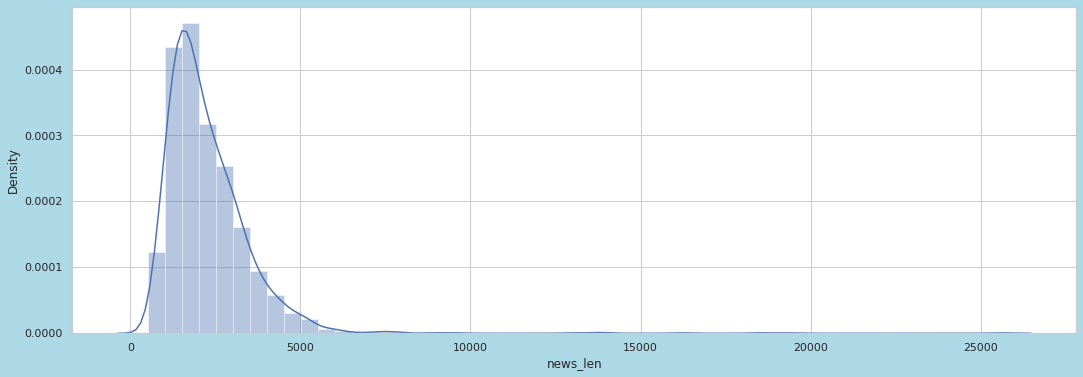

This is dist plot and its details are  Series([], Name: Number of Words, dtype: int64) 



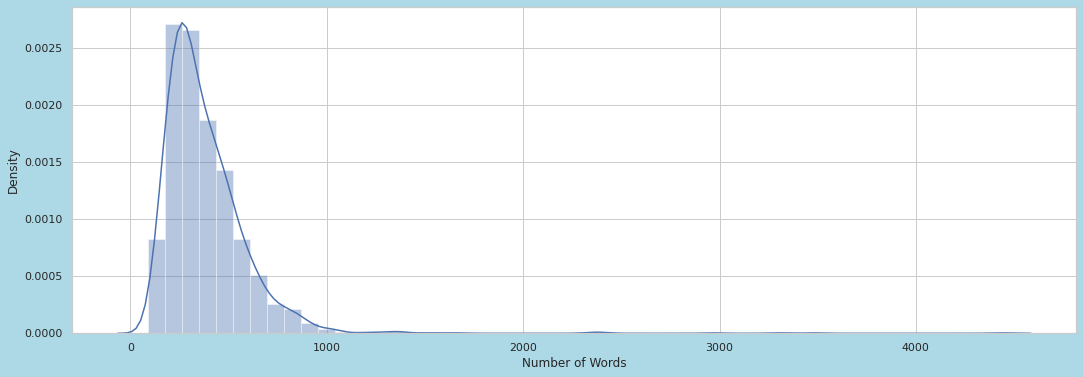

In [54]:
# Chart - 1 visualization code
uniplot()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

##### 2. What is/are the insight(s) found from the chart?

The charts are right skewed shows that most of the articles contains approx 2000 chatacters and 250 words

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By this graph we can see that average character is 2000 for a news so the company can consult to their editor prepare articles around this length.It wil  increase the efficiency of the editors.

#### Chart - 2

This is dist plot and its details are  Series([], Name: news_len, dtype: int64) 



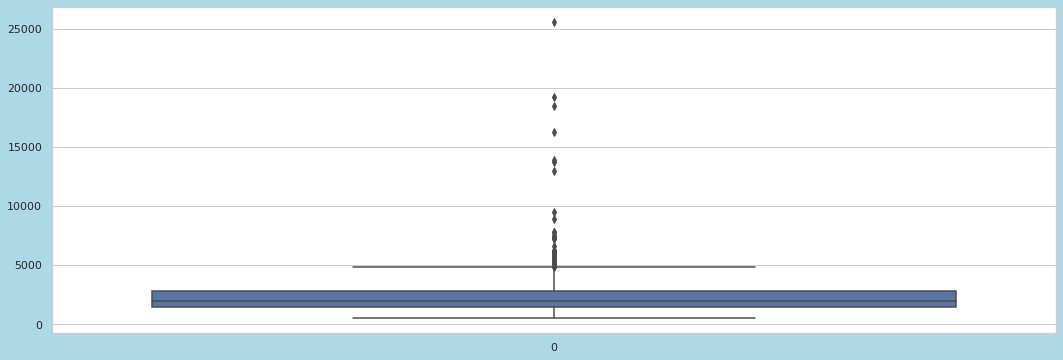

This is dist plot and its details are  Series([], Name: Number of Words, dtype: int64) 



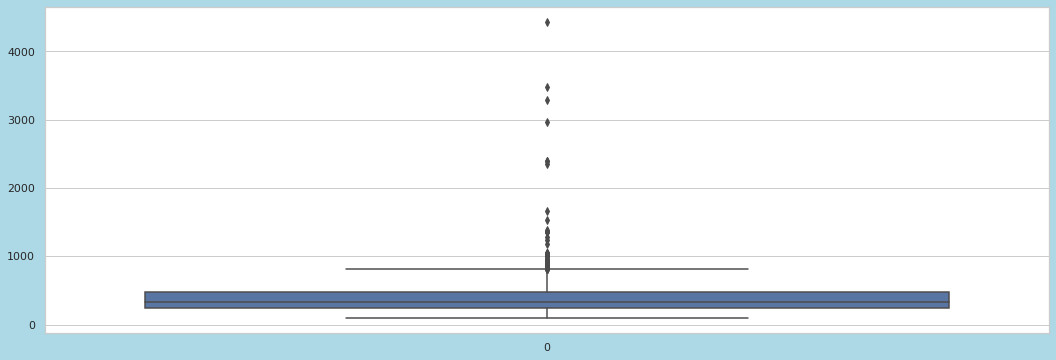

In [55]:
# Chart - 2 visualization code
uniplot(sns.boxplot)

##### 1. Why did you pick the specific chart?

The box plots shows the five-number summary of the data – the minimum, first quartile, median, third quartile, and maximum.

##### 2. What is/are the insight(s) found from the chart?

There are some news articles having more than 5000 characters and with words more than 800.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can instruct their editors to be concise and precise in their writing so that number of words and characters can be restricted.

#### Chart - 3

[['yuko', 'unit', 'buyer', 'face', 'loan', 'claim', 'owner', 'embattl', 'russian', 'oil', 'giant', 'yuko', 'ask', 'buyer', 'former', 'product', 'unit', 'pay', 'back', '900m', '£479m', 'loan', 'stateown', 'rosneft', 'bought', 'yugansk', 'unit', '93bn', 'sale', 'forc', 'russia', 'part', 'settl', '275bn', 'tax', 'claim', 'yuko', 'yuko', 'owner', 'menatep', 'group', 'say', 'ask', 'rosneft', 'repay', 'loan', 'yugansk', 'secur', 'asset', 'rosneft', 'alreadi', 'face', 'similar', '540m', 'repay', 'demand', 'foreign', 'bank', 'legal', 'expert', 'said', 'rosneft', 'purchas', 'yugansk', 'would', 'includ', 'oblig', 'pledg', 'asset', 'rosneft', 'pay', 'real', 'money', 'creditor', 'avoid', 'seizur', 'yugansk', 'asset', 'said', 'moscowbas', 'america', 'lawyer', 'jami', 'fireston', 'connect', 'case', 'menatep', 'group', 'manag', 'director', 'tim', 'osborn', 'told', 'reuter', 'news', 'agenc', 'default', 'fight', 'rule', 'law', 'exist', 'intern', 'arbitr', 'claus', 'credit', 'rosneft', 'offici', 'unavai

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


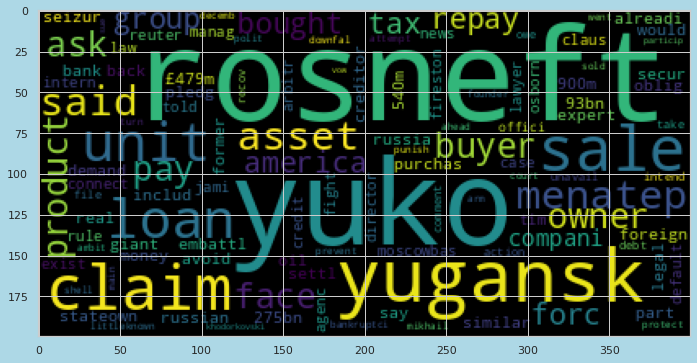

In [56]:
# Chart - 3 visualization code
wordmapviewer('business')

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.

##### 2. What is/are the insight(s) found from the chart?

From this word cloud we can see that Rosneft and yuko are important and most repeated in these Business news articles by BBC.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By this world cloud we can observe Yuko and Rosneft are important words if they are company on going through the articles we can see if news are positive or negative that may effect their share proce and we can invest according to it.

#### Chart - 4

[['fox', 'attack', 'blair', 'torus', 'lie', 'toni', 'blair', 'lie', 'took', 'uk', 'war', 'qualm', 'lie', 'elect', 'campaign', 'say', 'torus', 'torus', 'cochairman', 'liam', 'fox', 'speak', 'mr', 'blair', 'told', 'labour', 'member', 'torus', 'offer', 'hard', 'right', 'agenda', 'dr', 'fox', 'told', 'bbc', 'radio', 'will', 'lie', 'reason', 'go', 'war', 'guess', 'go', 'lie', 'anyth', 'would', 'discus', 'report', 'parti', 'repaid', '£500000', 'lord', 'ashcroft', 'predict', 'elect', 'defeat', 'prime', 'minist', 'ratchet', 'labour', 'preelect', 'campaign', 'weekend', 'helicopt', 'tour', 'countri', 'speech', 'parti', 'spring', 'confer', 'insist', 'know', 'poll', 'date', 'wide', 'expect', '5', 'may', 'seen', 'highli', 'person', 'speech', 'gateshead', 'sunday', 'mr', 'blair', 'said', 'passion', 'hunger', 'first', 'walk', 'door', '10', 'down', 'street', 'describ', 'relationship', 'public', 'start', 'euphor', 'struggl', 'live', 'expect', 'reach', 'point', 'rais', 'voic', 'throw', 'crockeri', 'warn

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


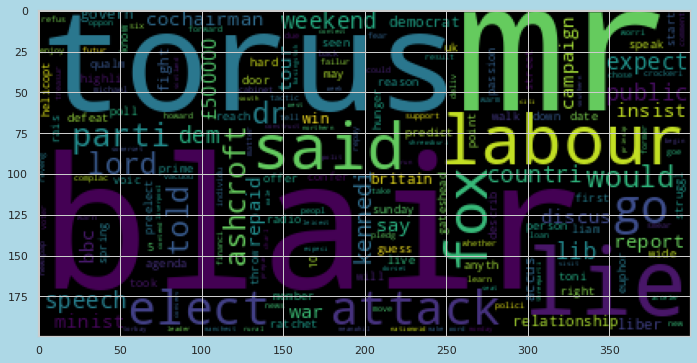

In [57]:
# Chart - 4 visualization code
wordmapviewer('politics')

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.

##### 2. What is/are the insight(s) found from the chart?

From this word cloud we can see Blair, Torus, Labour are important word may be linked to political party.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analysing these political decisions the company can make strategies of investment according to it.

#### Chart - 5

[['microsoft', 'seek', 'spywar', 'trojan', 'microsoft', 'investig', 'trojan', 'program', 'attempt', 'switch', 'firm', 'antispywar', 'softwar', 'spywar', 'tool', 'releas', 'microsoft', 'last', 'week', 'download', 'six', 'million', 'peopl', 'stephen', 'toulous', 'secur', 'manag', 'microsoft', 'said', 'malici', 'program', 'call', 'bankasha', 'trojan', 'sent', 'email', 'attach', 'microsoft', 'said', 'believ', 'program', 'widespread', 'recommend', 'user', 'use', 'antiviru', 'program', 'program', 'attempt', 'disabl', 'delet', 'microsoft', 'antispywar', 'tool', 'suppress', 'warn', 'messag', 'given', 'user', 'may', 'also', 'tri', 'steal', 'onlin', 'bank', 'password', 'person', 'inform', 'track', 'user', 'keystrok', 'microsoft', 'said', 'statement', 'investig', 'call', 'crimin', 'attack', 'softwar', 'earlier', 'week', 'microsoft', 'said', 'would', 'buy', 'antiviru', 'softwar', 'maker', 'sybari', 'softwar', 'improv', 'secur', 'window', 'email', 'softwar', 'microsoft', 'said', 'plan', 'offer', 'p

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


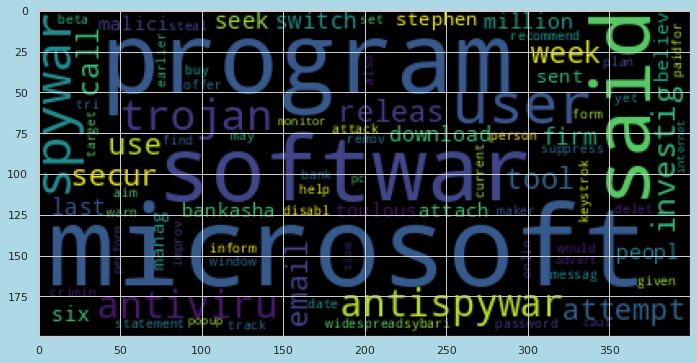

In [58]:
# Chart - 5 visualization code
wordmapviewer('tech')

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.

##### 2. What is/are the insight(s) found from the chart?

By analysing the word cloud we can see Microsoft,Software,Program,Antivirus are today's hot articles in tech industry.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By anlaysing the news articles the company can take investment decisions according the to decision taken by big tech gaints or important IT developements.

#### Chart - 6

[['dibaba', 'break', '5000m', 'world', 'record', 'ethiopia', 'tirunesh', 'dibaba', 'set', 'new', 'world', 'record', 'win', 'woman', '5000m', 'boston', 'indoor', 'game', 'dibaba', '14', 'minut', '3293', 'second', 'era', 'previou', 'world', 'indoor', 'mark', '143929', 'set', 'anoth', 'ethiopian', 'berhan', 'advertisementera', 'stuttgart', 'last', 'year', 'compatriot', 'kenenisa', 'bekel', 'record', 'hope', 'dash', 'miscount', 'lap', 'men', '3000m', 'stage', 'sprint', 'finish', 'lap', 'soon', 'ireland', 'alistair', 'cragg', '73989', 'bekel', 'battl', 'second', '74142', 'want', 'sit', 'back', 'get', 'outkick', 'said', 'cragg', 'kept', 'pace', 'plan', 'go', '500m', 'go', 'matter', 'bekel', 'made', 'mistak', 'race', 'mine', 'sweden', 'carolina', 'kluft', 'olymp', 'heptathlon', 'champion', 'slovenia', 'jolanda', 'ceplak', 'win', 'perform', 'kluft', 'took', 'long', 'jump', '663m', 'ceplak', 'easili', 'woman', '800m', '20152'], ['2004', 'irish', 'athlet', 'year', '2004', 'rememb', 'one', 'irish

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


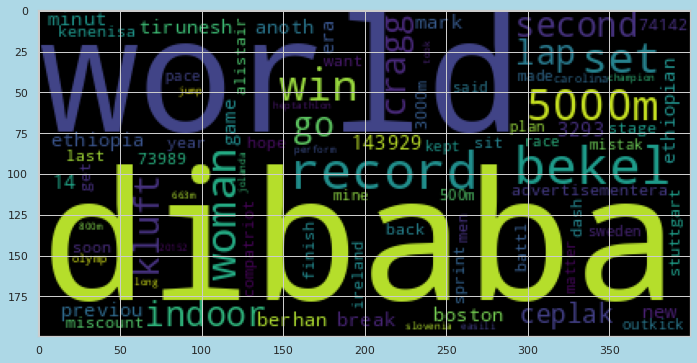

In [59]:
# Chart - 6 visualization code
wordmapviewer('sport')

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.

##### 2. What is/are the insight(s) found from the chart?

By analysing the word cloud we can see that  there are certains words like BIBABA,Record,Bekel are in news.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analysing the sports news the company can take decisions about their advertisement and investment if they are associated with sports.

#### Chart - 7

[['galleri', 'unveil', 'interact', 'tree', 'christma', 'tree', 'receiv', 'text', 'messag', 'unveil', 'london', 'tate', 'britain', 'art', 'galleri', 'spruce', 'antenna', 'receiv', 'bluetooth', 'text', 'sent', 'visitor', 'tate', 'messag', 'unwrap', 'sculptor', 'richard', 'wentworth', 'respons', 'decor', 'tree', 'broken', 'plate', 'light', 'bulb', '17th', 'year', 'galleri', 'invit', 'artist', 'dress', 'christma', 'tree', 'artist', 'decor', 'tate', 'tree', 'previou', 'year', 'includ', 'tracey', 'emin', '2002', 'plain', 'green', 'norway', 'spruce', 'display', 'galleri', 'foyer', 'light', 'bulb', 'adorn', 'dim', 'ordinari', 'domest', 'one', 'join', 'togeth', 'string', 'plate', 'decor', 'branch', 'auction', 'child', 'chariti', 'artwork', 'wentworth', 'work', 'assist', 'sculptor', 'henri', 'moor', 'late', '1960', 'reput', 'sculptor', 'grew', '1980', 'one', 'influenti', 'teacher', 'last', 'two', 'decad', 'wentworth', 'also', 'known', 'photographi', 'mundan', 'everyday', 'subject', 'cigarett', '

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


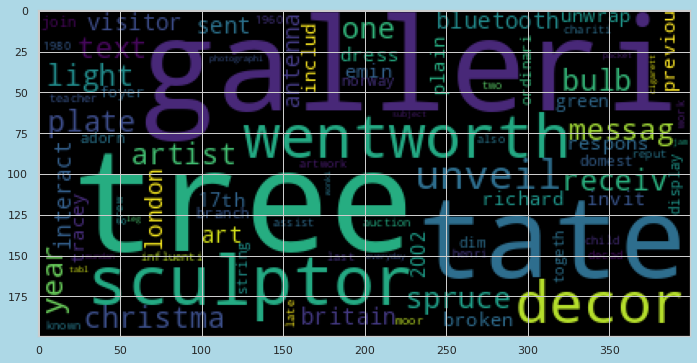

In [60]:
# Chart - 7 visualization code
wordmapviewer('entertainment')

##### 1. Why did you pick the specific chart?

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.

##### 2. What is/are the insight(s) found from the chart?

By analysing the word cloud we can see ,Tree,Sculptor,Galleri are in news for the entertainment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analysing the Entertainment articles the company can take decisions according to the readers reading those articles. 

#### Chart - 8

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: art_type, dtype: int64


<Axes: >

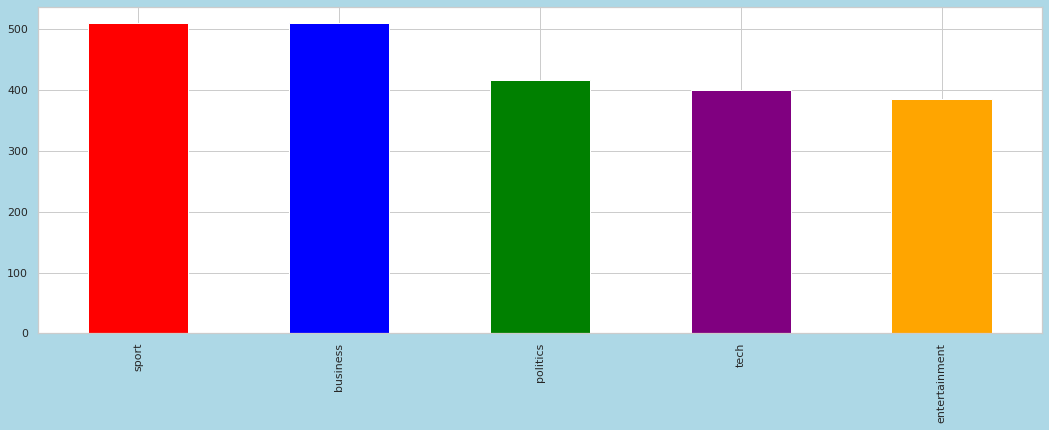

In [61]:
# Chart - 8 visualization code
print(data['art_type'].value_counts())
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
data['art_type'].value_counts().plot(kind='bar',color=['red', 'blue', 'green', 'purple', 'orange'])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

By observing the barchart we can see the company writes more news articles about Sports and Business than politics, tech, entertainment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can instruct their editors about writing more articles on entertainments as per customer demands.

#### Chart - 9

The Dataset has  510  topics  with 101743 number of words under topic    BUSINESS
The Dataset has  386  topics  with 75388 number of words under topic    ENTERTAINMENT
The Dataset has  417  topics  with 106754 number of words under topic    POLITICS
The Dataset has  511  topics  with 94499 number of words under topic    SPORT
The Dataset has  401  topics  with 115416 number of words under topic    TECH


<Axes: xlabel='topic', ylabel='wordnumberprep'>

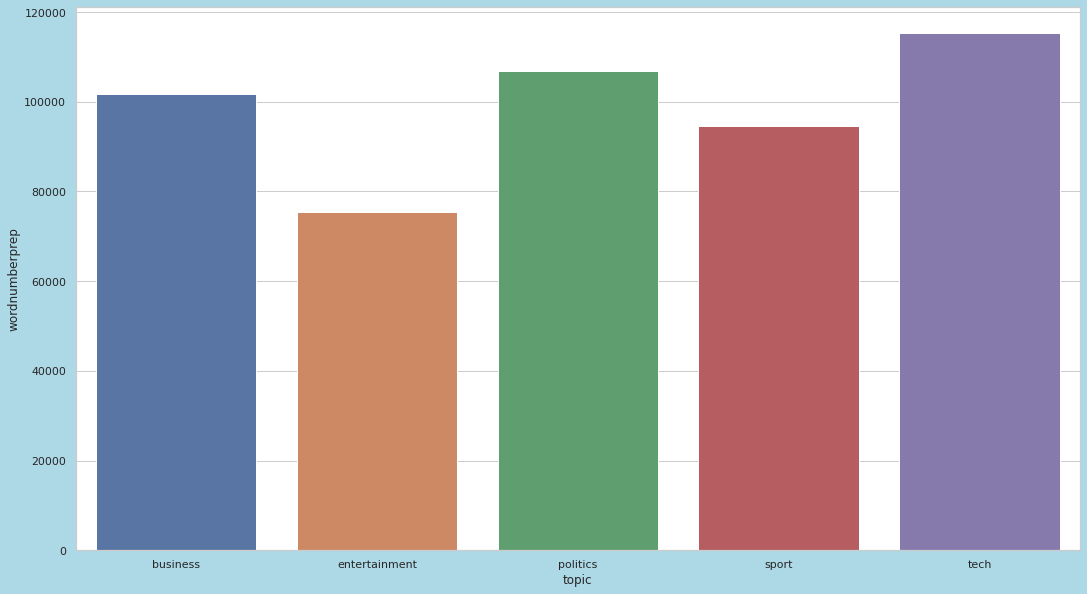

In [62]:
# Chart - 9 visualization code
wordplot = pd.DataFrame()
wordplot['topic'] =  data['art_type'].unique()
totalword = []
for j in range(0,len(wordplot['topic'])):
  counter = 0
  words = 0
  for i in range(0,len(data)):
    if (data['art_type'][i] == wordplot['topic'][j]):
      counter = counter + 1
      words = words + len(data['prepared_words'][i])
  topics = counter
  totalword.append(words)
  print('The Dataset has ',topics,' topics ',"with",words,'number of words under topic '," ",wordplot['topic'][j].upper())
wordplot['wordnumberprep'] = totalword

fig = plt.figure(figsize=(18,10))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.barplot(x = wordplot['topic'],y = wordplot['wordnumberprep'])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

The Dataset has  510  topics  with 101743 number of words under topic    BUSINESS

The Dataset has  386  topics  with 75388 number of words under topic    ENTERTAINMENT

The Dataset has  417  topics  with 106754 number of words under topic    POLITICS

The Dataset has  511  topics  with 94499 number of words under topic    SPORT

The Dataset has  401  topics  with 115416 number of words under topic    TECH

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can easily see the relation between number of characters and number of words in the different kind of articles.

In [63]:
data.head()

news  art_type  news_len  \
0  Yukos unit buyer faces loan claim\n \n The own...  business      1557   
1  Ad sales boost Time Warner profit\n \n Quarter...  business      2569   
2  Dollar gains on Greenspan speech\n \n The doll...  business      2258   
3  US trade gap hits record in 2004\n \n The gap ...  business      1960   
4  High fuel prices hit BA's profits\n \n British...  business      2411   

   Number of Words                                     prepared_words  
0              264  [yuko, unit, buyer, face, loan, claim, owner, ...  
1              421  [advertis, sale, boost, time, warner, profit, ...  
2              384  [dollar, gain, greenspan, speech, dollar, hit,...  
3              328  [america, trade, gap, hit, record, 2004, gap, ...  
4              406  [high, fuel, price, hit, ba, profit, british, ...

#### Chart - 10

In [64]:
# Chart - 10 visualization code
totalwords = []
for j in range(0,len(wordplot['topic'])):
  counter = 0
  words = 0
  for i in range(0,len(data)):
    if (data['art_type'][i] == wordplot['topic'][j]):
      counter = counter + 1
      words = words + len(data['news'][i])
  topics = counter
  totalwords.append(words)
  print('The Dataset has ',topics,' topics ',"with",words,'number of words under topic '," ",wordplot['topic'][j].upper())
wordplot['wordnumbernews'] = totalwords

The Dataset has  510  topics  with 1017581 number of words under topic    BUSINESS
The Dataset has  386  topics  with 747869 number of words under topic    ENTERTAINMENT
The Dataset has  417  topics  with 1123776 number of words under topic    POLITICS
The Dataset has  511  topics  with 974159 number of words under topic    SPORT
The Dataset has  401  topics  with 1197897 number of words under topic    TECH


<Axes: title={'center': ' Percentage of text not prepared'}>

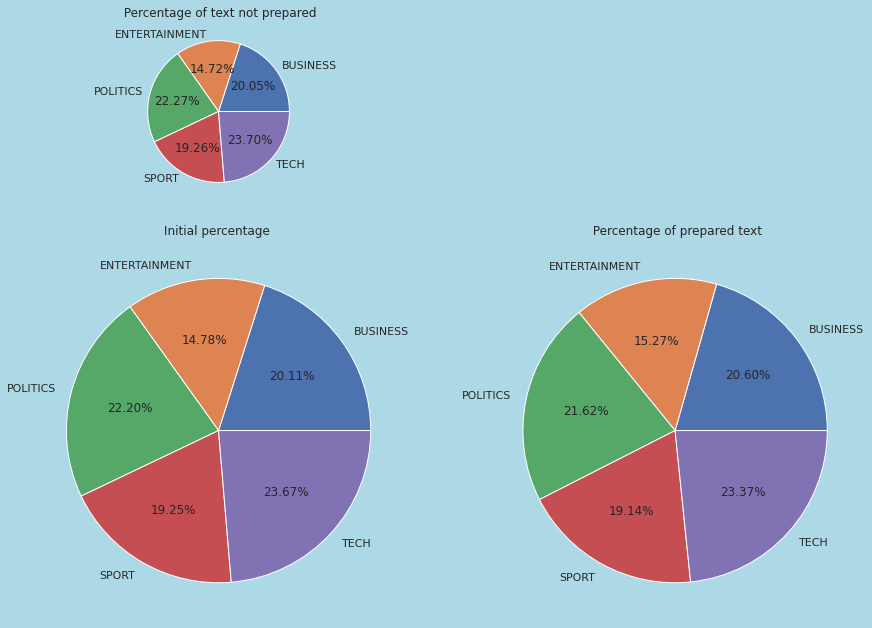

In [65]:
wordplot['worddifference'] = wordplot['wordnumbernews'] -	wordplot['wordnumberprep']
fig = plt.figure(figsize=(15,15))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
fig.add_subplot(121)
(wordplot['wordnumbernews']).plot(ylabel="",title="Initial percentage ",kind='pie',autopct='%1.2f%%',labels=wordplot['topic'].str.upper())
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
fig.add_subplot(122)
(wordplot['wordnumberprep']).plot(ylabel="",title=" Percentage of prepared text",kind='pie',autopct='%1.2f%%',labels=wordplot['topic'].str.upper())
fig.add_subplot(421)
(wordplot['worddifference']).plot(ylabel="",title=" Percentage of text not prepared",kind='pie',autopct='%1.2f%%',labels=wordplot['topic'].str.upper())

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

This Pie chart shows the percentage of words in the selected type of articles before any changes and after the changes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can easily observe there is not any significant change in percentage of words before and after word processing.

### **Multivariate Analysis**

In [66]:
data['wordprepared'] = wordplot['wordnumberprep']
data['wordnews'] = wordplot['wordnumbernews']
data['wordiff'] = wordplot['worddifference']

#### Chart - 11 - Correlation Heatmap

<Axes: >

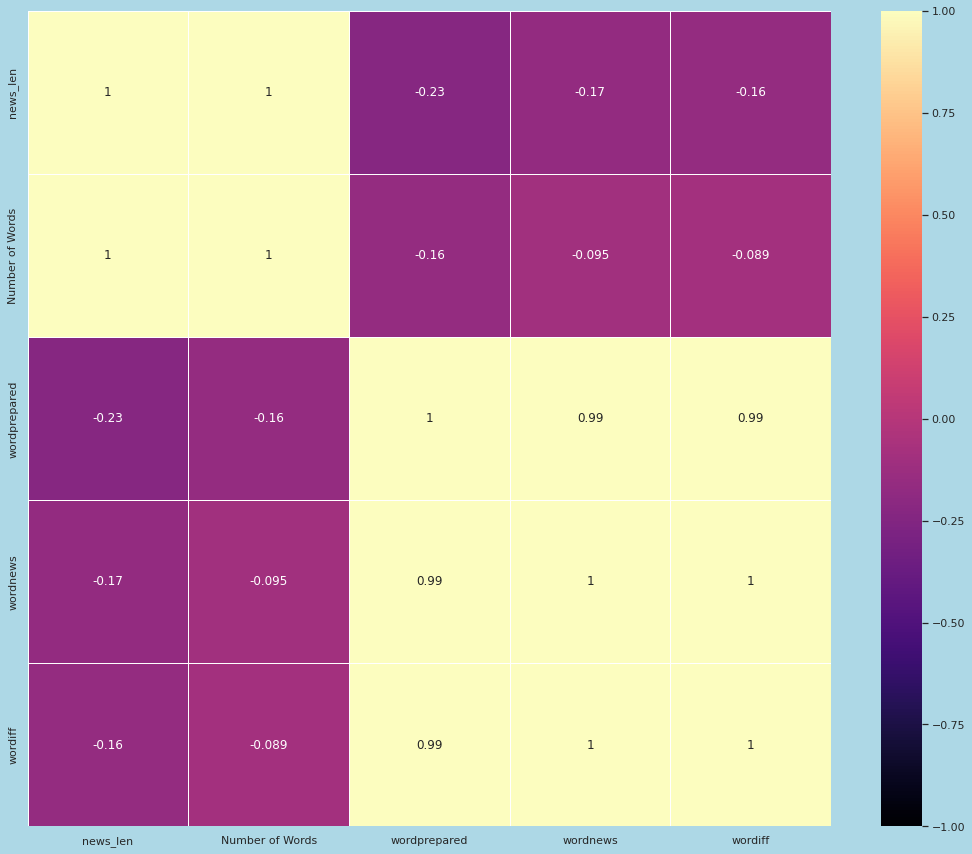

In [67]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(18,15))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True, cmap='magma', linewidths=0.8)

##### 1. Why did you pick the specific chart?

Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of this Heat Map is to better visualize collinearity of the columns within the dataset and assist us towards understanding the linear collinearlity.

##### 2. What is/are the insight(s) found from the chart?

There is positive correlation between the column word news and word prepared and word difference where word difference represents number of words before word processing and after word processing. 

#### Chart - 12 - Pair Plot 

This is pair plot 



<Figure size 1296x1080 with 0 Axes>

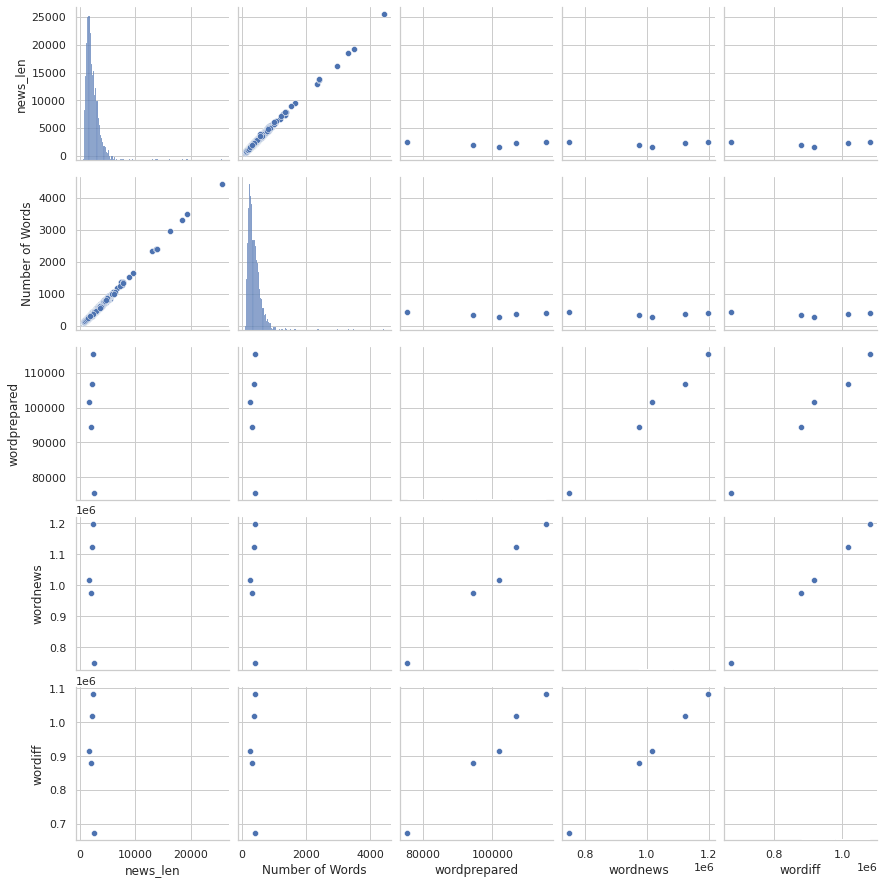

In [68]:
# Pair Plot visualization code
print("This is pair plot \n")
fig = plt.figure(figsize=(18,15))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?

In these pair plot we can see that the number of words in column news length is directly related with number of words. 

## **7. Data Pre-processing**

### 1. Feature Selection and Extraction


#### 1. Feature Selection

In [69]:
tokenized_reviews = data['prepared_words']

#### 2. Deep Extraction

In [70]:
print(tokenized_reviews)

0       [yuko, unit, buyer, face, loan, claim, owner, ...
1       [advertis, sale, boost, time, warner, profit, ...
2       [dollar, gain, greenspan, speech, dollar, hit,...
3       [america, trade, gap, hit, record, 2004, gap, ...
4       [high, fuel, price, hit, ba, profit, british, ...
                              ...                        
2220    [bt, program, beat, dialler, scam, bt, introdu...
2221    [bad, email, habit, sustain, spam, bad, behavi...
2222    [microsoft, plan, isaf, id, system, microsoft,...
2223    [camera, phone, musthav, four, time, mobil, ca...
2224    [beckham, viru, spot, net, viru, writer, trade...
Name: prepared_words, Length: 2225, dtype: object


**Applying Bag of words on the processed text**

In [71]:
dictionary = corpora.Dictionary(tokenized_reviews) # creating dictionary out of processed words
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews] # Creating matrix 

In [72]:
print(dictionary)

Dictionary<24433 unique tokens: ['275bn', '540m', '900m', '93bn', 'action']...>


## ***8. ML Model Implementation***

### ML Model - 1 LDA by Gensim

In [73]:
# ML Model - 1 Implementation
LDA = gensim.models.ldamodel.LdaModel
# Fit the Algorithm
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=8, random_state=20,
                chunksize=300, passes=300,iterations=200)

In [74]:
# Predict on the model
lda_model.print_topics()

[(0,
  '0.020*"highdefinit" + 0.014*"andrew" + 0.013*"bid" + 0.012*"format" + 0.010*"offer" + 0.010*"deutsch" + 0.009*"hd" + 0.009*"lse" + 0.008*"takeov" + 0.008*"laser"'),
 (1,
  '0.019*"use" + 0.017*"said" + 0.014*"peopl" + 0.014*"technolog" + 0.014*"mobil" + 0.012*"phone" + 0.011*"servic" + 0.010*"user" + 0.009*"net" + 0.009*"digit"'),
 (2,
  '0.026*"said" + 0.023*"mr" + 0.013*"would" + 0.008*"say" + 0.008*"govern" + 0.007*"parti" + 0.007*"labour" + 0.007*"elect" + 0.006*"minist" + 0.006*"peopl"'),
 (3,
  '0.030*"eu" + 0.024*"chelsea" + 0.023*"patent" + 0.017*"airlin" + 0.014*"european" + 0.012*"tournament" + 0.007*"india" + 0.007*"air" + 0.007*"terrorist" + 0.007*"turkey"'),
 (4,
  '0.028*"film" + 0.016*"best" + 0.015*"award" + 0.009*"show" + 0.009*"dvd" + 0.008*"year" + 0.008*"includ" + 0.007*"also" + 0.006*"movi" + 0.006*"director"'),
 (5,
  '0.011*"win" + 0.008*"play" + 0.007*"club" + 0.007*"match" + 0.007*"titl" + 0.007*"team" + 0.006*"machin" + 0.006*"second" + 0.006*"cup" + 0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Computing Perplexity score
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.


Perplexity:  -7.951655456525471


In [76]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda) # a measure of how good the model is. higher the better.


Coherence Score:  0.496610988598741


In [77]:
# Visualizing evaluation Metric Score chart
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.161273 -0.011172       1        1  31.216223
2      0.177203 -0.042418       2        1  20.204974
7      0.163783  0.100066       3        1  18.762830
1      0.169860 -0.214759       4        1  10.210860
5     -0.026407  0.271738       5        1  10.098274
4     -0.125612  0.072047       6        1   7.496921
3     -0.272949 -0.087528       7        1   1.232097
0     -0.247151 -0.087975       8        1   0.777821, topic_info=          Term         Freq        Total Category  logprob  loglift
354         mr  2958.000000  2958.000000  Default  30.0000  30.0000
177       film  1049.000000  1049.000000  Default  29.0000  29.0000
1049      game  1823.000000  1823.000000  Default  28.0000  28.0000
896        use  1509.000000  1509.000000  Default  27.0000  27.0000
90        said  7065.000000  7065.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
6175      soni    24.682988   299.188645   Topic8  -5.0473   2.3615
174    exchang    19.235466   131.188323   Topic8  -5.2967   2.9366
2237  electron    18.698776   154.501512   Topic8  -5.3250   2.7447
6162   display    17.898035   116.534421   Topic8  -5.3688   2.9829
590      share    15.313091   512.280421   Topic8  -5.5247   1.3463

[480 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
410       1  0.853095  2004
410       4  0.091345  2004
410       6  0.055459  2004
120       1  0.884831  2005
120       4  0.100922  2005
...     ...       ...   ...
402       1  0.713529  year
402       3  0.135549  year
402       5  0.038677  year
402       6  0.112054  year
112       2  0.994600  yuko

[792 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 8, 2, 6, 5, 4, 1])

Values of lambda = 1 will show:

Those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus.


#### 2. Feature Selection

**data['prepared_words']**

and 

**data['art_type']**

are selected column from the dataset for further model developments

##### What all feature selection methods have you used  and why?

We selected the columns prepared_words,art_type because the prepared word contains the articles after text preprocsessing and article type contains the name of type of articles on which we have to classify the news.

### ML Model - 2 XGBoost

In [78]:
# Encode your categorical columns
label = LabelEncoder()

In [79]:
data['labelled_art'] = label.fit_transform(data['art_type'])

In [80]:
data['model2'] = data['news'].apply(lambda x:expand_contractions(x))
data['model2'] = data['model2'].str.lower()
data['model2'] = data['model2'].apply(remove_punctuations)
data['model2'] = data['model2'].apply(remove_url)

In [81]:
vectorizer = TfidfVectorizer( analyzer='word',min_df = 0, sublinear_tf=True,stop_words='english')
xtrain = vectorizer.fit_transform(data['model2'])

In [82]:
print("shape of train tfidf vector is ",xtrain.shape) # Printing the shape of xtrain vector after tfidf

shape of train tfidf vector is  (2225, 32780)


In [83]:
feature_names = vectorizer.get_feature_names_out()  # getting feature names after applying tfidf

In [84]:
# zipping the feature names with the vectorized words after applying tfidf
print('\nidf values:')
for ele1, ele2 in zip(feature_names, vectorizer.idf_):
    print(ele1, ':', ele2)

Streaming output truncated to the last 5000 lines.
spacey : 6.916202062607435
spadea : 7.3216671707156
spades : 7.60934924316738
spaghetti : 8.014814351275545
spain : 4.756717813254063
spala : 8.014814351275545
spall : 7.60934924316738
spam : 5.489085706967289
spamcop : 8.014814351275545
spamhaus : 7.60934924316738
spammer : 7.3216671707156
spammers : 5.99991133073328
spamming : 8.014814351275545
spammingtype : 8.014814351275545
spamrelated : 7.60934924316738
spanglish : 8.014814351275545
spaniard : 5.817589773939326
spaniards : 8.014814351275545
spanish : 4.994389465131182
spanishlanguage : 7.3216671707156
spanishspeaking : 7.60934924316738
spanning : 7.3216671707156
spans : 8.014814351275545
spar : 7.60934924316738
spare : 6.0689042022202315
spared : 7.3216671707156
sparingly : 8.014814351275545
spark : 6.143012174373953
sparkassen : 8.014814351275545
sparked : 5.21145397036901
sparking : 7.09852361940139
sparkled : 8.014814351275545
sparkling : 7.60934924316738
sparks : 7.3216671707

### Splitting the Dataset in Training and Test Data

In [85]:
m2xtrain, m2xtest, m2ytrain, m2ytest = train_test_split(xtrain,data['labelled_art'],test_size=.2,random_state=10) # Spliting the data set for applying model

In [86]:
m2xtrain.shape

(1780, 32780)

We splitted the data 80:20 as we need more data in training data set.

In [87]:
# ML Model - 2 Implementation
clf = XGBClassifier(random_state=35, seed=5, colsample_bytree=0.6, subsample=0.7)

# Fit the Algorithm
clf.fit(m2xtrain,m2ytrain)
print(m2ytrain[:])

24      0
317     0
949     2
31      0
746     1
       ..
2009    4
1180    2
1344    3
527     1
1289    2
Name: labelled_art, Length: 1780, dtype: int64


In [88]:
# Predicting on test data
ypred = clf.predict(m2xtest)

In [89]:
# Getting accuracy of the model
metrics.accuracy_score(m2ytest,ypred)

0.9617977528089887

<Axes: xlabel='labelled_art', ylabel='Density'>

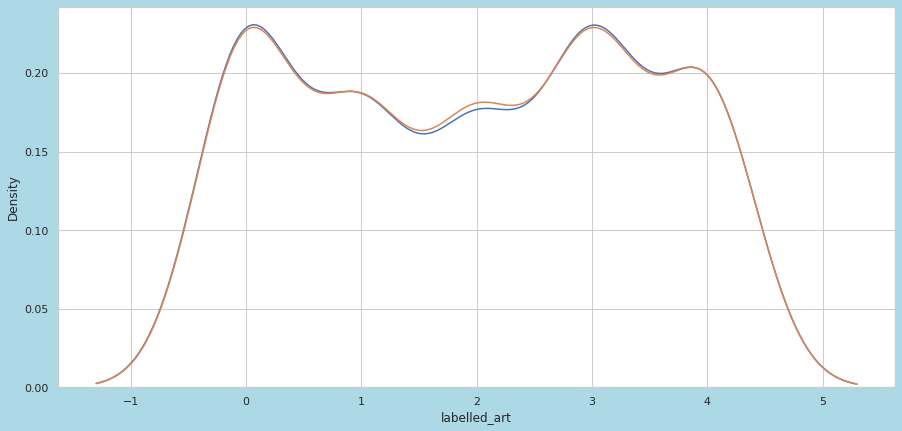

In [90]:
# PLotting the kde plot of the ypredicted on ytest
fig = plt.figure(figsize=(15,7))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.kdeplot(ypred)
sns.kdeplot(m2ytest)

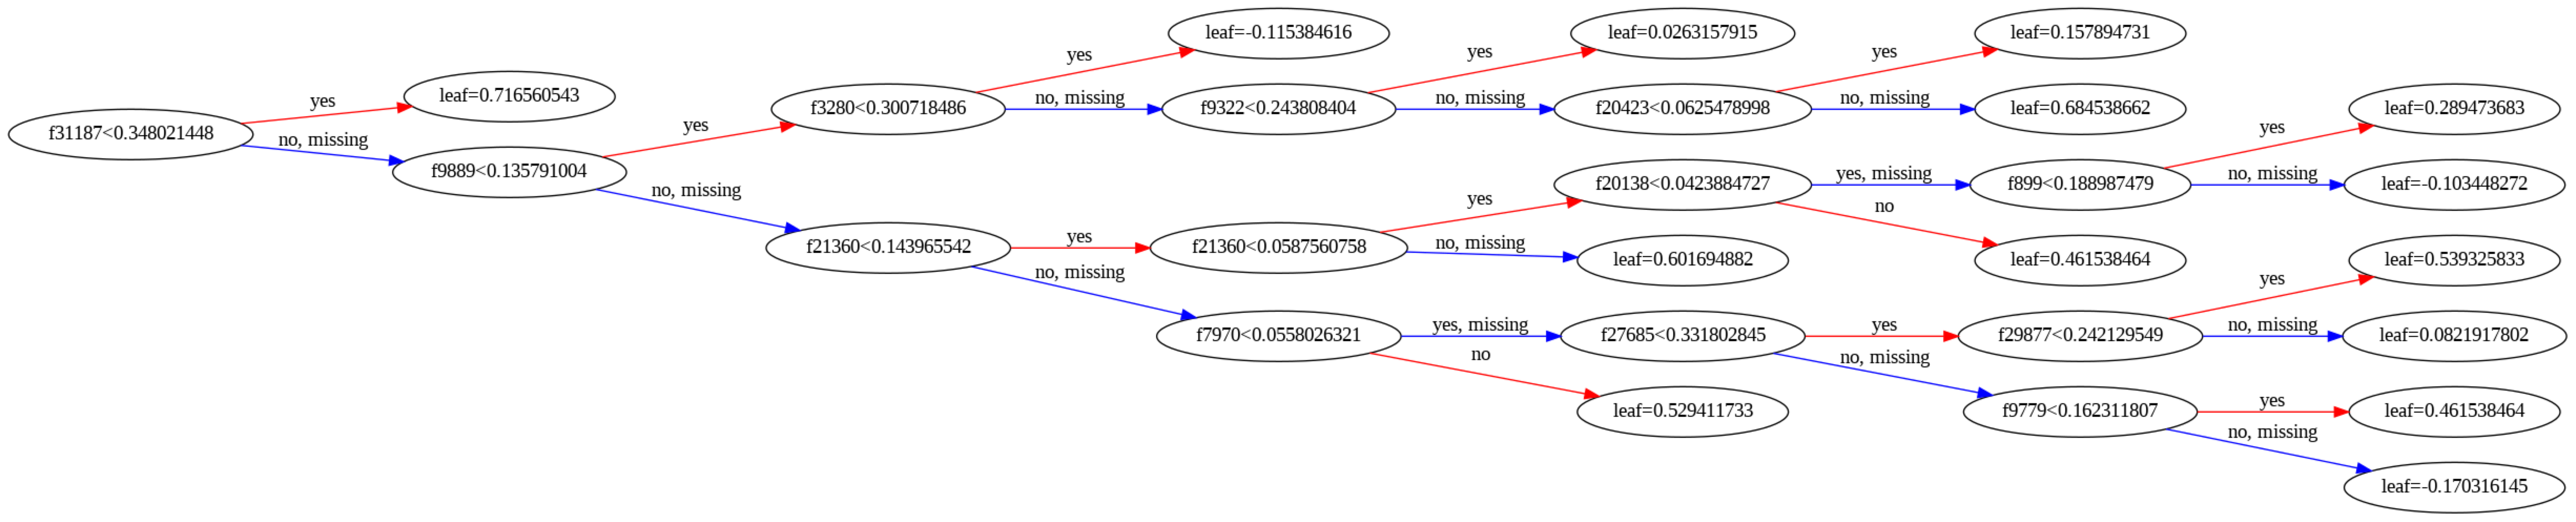

In [91]:
# Plotting the tree strutucre  of the model
from xgboost import plot_tree
plot_tree(clf, num_trees=4, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(100, 150)

### **Making Confusion metrix on the Test dataset**

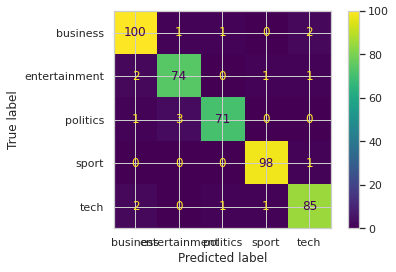

In [92]:
# Create our predictions
yr_test_predicted = clf.predict(m2xtest)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(m2ytest, ypred)
actual = m2ytest
predicted = ypred

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['business', 'entertainment', 'politics', 'sport', 'tech'])
cm_display.plot()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

From the confusin metrix we can see that

Business has 100% 

Entertainment has 74%

Politics has 71%

Sports has 98%

Tech has 85% 

correct values and overall accuracy of our model is more than 96%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
#  [35,42,55]
parameters = {
    "random_state" : [35,42],
    "subsample" : [0.6,0.7]
}

In [94]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(clf,parameters,cv=3)

# Fit the Algorithm
# cv.fit(m2xtrain,m2ytrain)
# Predict on the model
#cv.best_params_

##### Which hyperparameter optimization technique have you used and why?

 In this model we used 
 
 random_state=35, 
 
 seed=5, 
 
 colsample_bytree=0.6, 
 
 subsample=0.7

 These hyperparameters and gridsearch cv for the optimisation of our model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After many iterations we noted the improvement and we applied the best parameters to optimise the performance of the model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

From the confusin metrix we can see that

Business has 99% 

Entertainment has 73%

Politics has 72%

Sports has 98%

Tech has 85% 

correct values and overall accuracy of our model is more than 95%.
From these results the company can segregate their articles on basis of their types using this model.

### ML Model - 3 Neural Network

In [95]:
# Definig the model
model3 = Sequential()


In [96]:
# adding layers to neural network
model3.add(Dense(5000, input_dim = 32780, activation = 'LeakyReLU')) # first layer
model3.add(Dense(2000, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(800, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(800, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(1000, activation = 'LeakyReLU'))
model3.add(Dense(500, activation = 'LeakyReLU'))
model3.add(Dense(200, activation = 'LeakyReLU'))
model3.add(Dense(50, activation = 'LeakyReLU'))
model3.add(Dense(10, activation = 'LeakyReLU'))
model3.add(Dense(1, activation = 'softmax'))

In [97]:
# Compiling the model
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [98]:
# Intro to the model 
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              163905000 
                                                                 
 dense_1 (Dense)             (None, 2000)              10002000  
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 800)               800800    
                                                                 
 dense_4 (Dense)             (None, 1000)              801000    
                                                                 
 dense_5 (Dense)             (None, 800)               800800    
                                                                 
 dense_6 (Dense)             (None, 1000)              8

In [ ]:
# Fitting the Algorithm
history = model3.fit(m2xtrain.toarray(), m2ytrain,epochs = 20, batch_size = 200)

Epoch 1/20
9/9 [==============================] - 54s 5s/step - loss: -499077.1875 - accuracy: 0.1730
Epoch 2/20
9/9 [==============================] - 49s 5s/step - loss: -9316806656.0000 - accuracy: 0.1730
Epoch 3/20
9/9 [==============================] - 49s 6s/step - loss: -7589426364416.0000 - accuracy: 0.1730
Epoch 4/20
9/9 [==============================] - 55s 6s/step - loss: -1251002506280960.0000 - accuracy: 0.1730
Epoch 5/20
9/9 [==============================] - 54s 6s/step - loss: -100841339574288384.0000 - accuracy: 0.1730
Epoch 6/20
9/9 [==============================] - 48s 5s/step - loss: -4271889371566702592.0000 - accuracy: 0.1730
Epoch 7/20
9/9 [==============================] - 56s 6s/step - loss: nan - accuracy: 0.1927
Epoch 8/20
9/9 [==============================] - 58s 6s/step - loss: nan - accuracy: 0.2281
Epoch 9/20
9/9 [==============================] - 59s 7s/step - loss: nan - accuracy: 0.2281
Epoch 10/20
9/9 [==============================] - 59s 6s/step 

In [ ]:
# Predict on the model
ypredn = model3.predict(m2xtest.toarray()) 
classes_x=np.argmax(ypredn,axis=1)

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    # val_acc = history.history['val_acc']
    loss = history.history['loss']
    # val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    # plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    # plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training loss')
    plt.legend()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
_, accuracy = model3.evaluate(m2xtrain.toarray(),m2ytrain)
print('Training accuracy is : %.2f' %(accuracy * 100))

Training accuracy = More than 22% and
Loss =  0

In [ ]:
plot_history(history)

##### Which hyperparameter optimization technique have you used and why?

Perceptrons = 5000,

activation function = 'LeakyReLU'

These are the  parameters we used to train the neural network

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As our dataset has less values so we need more data to increase our neural network.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In LDA model pyLDAvis is used to show the top 30 important words selected from the articles segregated.

Confusion Matrix is Used to get the accuracy of our XGboost model.

In neural nnetwork sccuracy score is used to get the accuracy of our classification model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

To get the most important words for the article that is used for the segregation of topic we have used LDA model while to classify the article topic vise we have to use the XGBoost while our neural network require more training data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We have used pyLDAvis for showing the top 30 most important words used for the segregation of the articles which is highly interactive.

we have also plotted the treemap for the XGboost model to understand the features under consideration.

## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'regression_model.sav'
pickle.dump(clf, open(filename, 'wb'))
  
# load the model
load_model = pickle.load(open(filename, 'rb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:

# Load the File and predict unseen data.
y_pred = load_model.predict(m2xtest)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We applied LDA model on the dataset to get the overview of most frequent words used to segregate the articles.

XGBoost to classify the articles.We also applied neural network considering to increase the accuracy of neural network that can be used for topic modeling. 

In the XGboost we got the accuracy more than 96% and it also explains the  feature importance very well.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***